In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from fit_psyche.psychometric_curve import PsychometricCurve

In [13]:
df = pd.read_csv('users_data.csv')

In [14]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


In [15]:
ml_experiences = df['ML Experience'].values
ml_experience_dict = {}
for experience in ml_experiences:
    if experience in ml_experience_dict.keys():
        ml_experience_dict[experience] += 1
    else:
        ml_experience_dict[experience] = 1
ml_experience_dict

{4: 16, 2: 5, 3: 4, 1: 3, 5: 2}

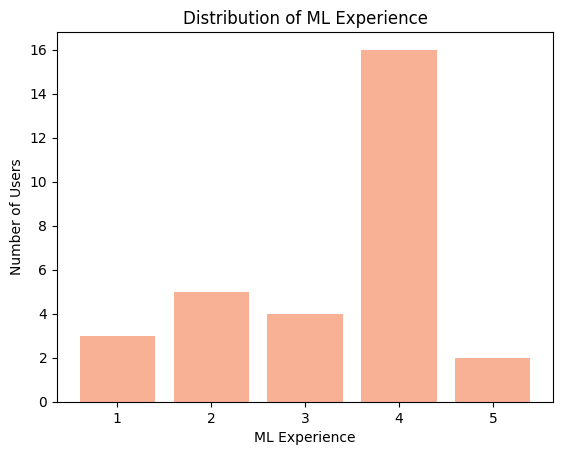

In [6]:
values = list(ml_experience_dict.values())
labels = list(ml_experience_dict.keys())
plt.bar(labels, values, color='#f8b195')
plt.title('Distribution of ML Experience')
plt.xlabel('ML Experience')
plt.ylabel('Number of Users')
plt.savefig('updated_images/ml_experience.png')

In [7]:
df.columns

Index(['Name', 'Age', 'Gender', 'ML Experience', 'Zero Percentage',
       'Twenty Five Percentage', 'Fifty Percentage', 'Seventy Five Percentage',
       'Hundred Percentage'],
      dtype='object')

In [16]:
low_percentages = {}
high_percentages = {}
low_range = [3, 1, 2]
high_range = [4, 5]

In [39]:
low_range_values = df.loc[df['ML Experience'].isin(low_range)]
high_range_values = df.loc[df['ML Experience'].isin(high_range)]
low_percentages = {}
high_percentages = {}
for column in low_range_values.columns[4:]:
    low_percentages[column] = low_range_values[column].value_counts(normalize=True).to_dict()
for column in high_range_values.columns[4:]:
    high_percentages[column] = high_range_values[column].value_counts(normalize=True).to_dict()

In [44]:
low_yes_values = {}
for key in low_percentages.keys():
    low_yes_values[key] = low_percentages[key]['y']
low_yes_values

{'Zero Percentage': 0.25,
 'Twenty Five Percentage': 0.5,
 'Fifty Percentage': 0.5833333333333334,
 'Seventy Five Percentage': 0.75,
 'Hundred Percentage': 0.75}

In [45]:
high_yes_values = {}
for key in high_percentages.keys():
    high_yes_values[key] = high_percentages[key]['y']
high_yes_values

{'Zero Percentage': 0.5555555555555556,
 'Twenty Five Percentage': 0.7777777777777778,
 'Fifty Percentage': 0.5555555555555556,
 'Seventy Five Percentage': 0.8333333333333334,
 'Hundred Percentage': 0.8888888888888888}

In [50]:
import pylab
from scipy.optimize import curve_fit

In [46]:
def sigmoid(x, x0, k):
    y = 1 / (1 + np.exp(-k*(x-x0)))
    return y

In [53]:
def do_work(values, group):
    x_values = [0, 25, 50, 75, 100]
    popt, pcov = curve_fit(sigmoid, x_values, list(values.values()))
    x = np.linspace(0, 100, 100)
    y = sigmoid(x, *popt)

    ydata = list(values.values())
    pylab.plot(x_values, ydata, 'o', label='data', color='#F67280')
    pylab.plot(x, y, label='fit', color='#6C5B78')
    pylab.ylim(0, 1.05)
    pylab.legend(loc='best')
    pylab.xlabel("Model Accuracy of {} users".format(group))
    pylab.ylabel("Probability Of Yes")
    pylab.title("Psychometric Curve for Belief in Model Accuracy")
    pylab.savefig('updated_images/fit_{}.png'.format(group))
    pylab.show()
    return pcov

/home/tejasvi/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


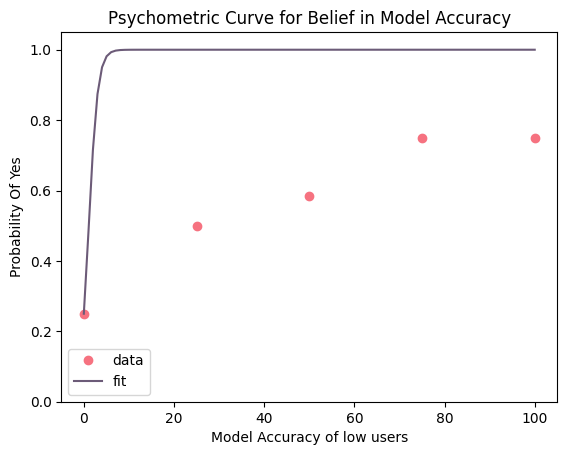

In [54]:
low_value = do_work(low_yes_values, 'low')

In [55]:
low_value

array([[inf, inf],
       [inf, inf]])

/home/tejasvi/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


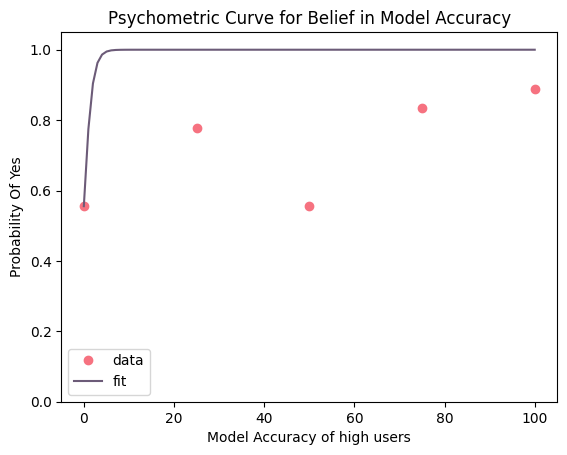

In [59]:
high_value = do_work(high_yes_values, 'high')

In [60]:
high_value

array([[inf, inf],
       [inf, inf]])

In [58]:
ages = df['Age'].values
age_dict = {}
for age in ages:
    if age in age_dict.keys():
        age_dict[age] += 1
    else:
        age_dict[age] = 1
age_dict

{20: 3, 21: 15, 22: 7, 23: 1, 18: 2, 17: 2}

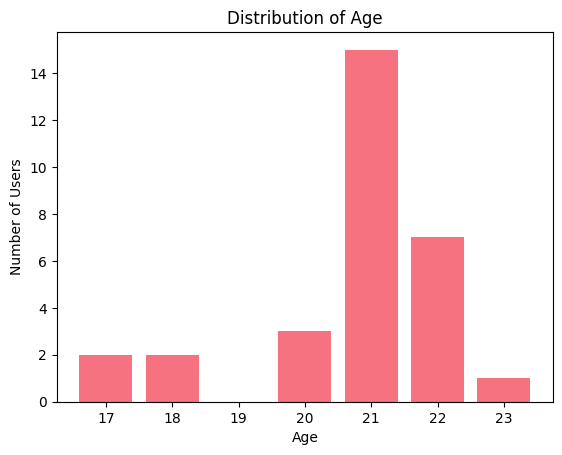

In [112]:
values = list(age_dict.values())
labels = list(age_dict.keys())
plt.bar(labels, values, color='#F67280')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.savefig('updated_images/age.png')

In [119]:
new_df = df['Gender'].str.lower()

In [121]:
genders = new_df.values
gender_dict = {}
for gender in genders:
    if gender in gender_dict.keys():
        gender_dict[gender] += 1
    else:
        gender_dict[gender] = 1
gender_dict

{'m': 25, 'f': 5}

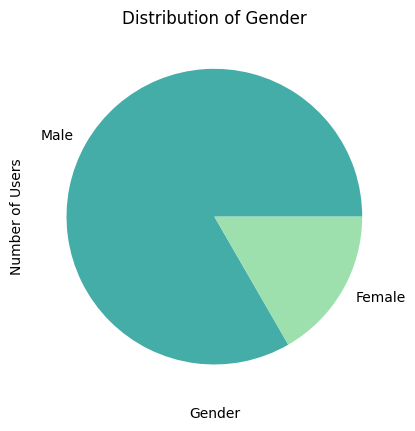

In [124]:
values = list(gender_dict.values())
labels = ['Male', 'Female']
plt.pie(values, labels=labels, colors=['#45ADA8', '#9DE0AD'])
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.savefig('updated_images/gender.png')